In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [3]:
al

In [4]:
data='creditcard.csv'
bank_data=pd.read_csv(data)

In [5]:
bank_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [7]:
corr_series=bank_data.corr()['Class'].sort_values(ascending=False)
corr_df=corr_series.reset_index()

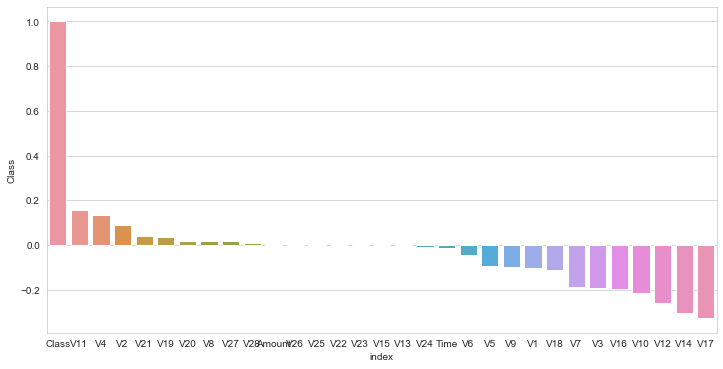

In [8]:
fig=plt.figure(figsize=(12,6))
sns.barplot(x=corr_df['index'],y=corr_df['Class'])

In [9]:
X=bank_data[['V11','V4','V2']].values
Y=bank_data['Class'].apply(lambda n:int(n)).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential()
model.add(Dense(20,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(10,activation='sigmoid'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))
                
model.compile(optimizer= 'adam', loss='binary_crossentropy')

In [43]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=10)

In [44]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test), 
          batch_size=100, 
          epochs=100,
          callbacks=[earlyStopping])

Train on 199364 samples, validate on 85443 samples
Epoch 1/100
199364/199364 [==============================] - 21s 106us/sample - loss: 0.0705 - val_loss: 0.0150
Epoch 2/100
199364/199364 [==============================] - 17s 85us/sample - loss: 0.0239 - val_loss: 0.0142
Epoch 3/100
199364/199364 [==============================] - 17s 88us/sample - loss: 0.0204 - val_loss: 0.0132
Epoch 4/100
199364/199364 [==============================] - 17s 87us/sample - loss: 0.0171 - val_loss: 0.0126
Epoch 5/100
199364/199364 [==============================] - 18s 88us/sample - loss: 0.0152 - val_loss: 0.0125
Epoch 6/100
199364/199364 [==============================] - 17s 87us/sample - loss: 0.0145 - val_loss: 0.0124
Epoch 7/100
199364/199364 [==============================] - 18s 91us/sample - loss: 0.0139 - val_loss: 0.0124
Epoch 8/100
199364/199364 [==============================] - 18s 89us/sample - loss: 0.0136 - val_loss: 0.0123
Epoch 9/100
199364/199364 [==============================] -

array([[85299,     0],
       [  144,     0]], dtype=int64)

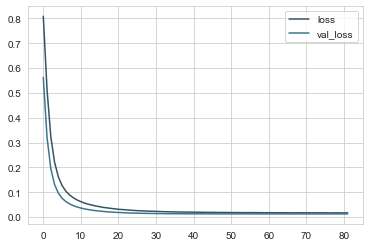

In [36]:
y_predict=model.predict_classes(X_test)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
confusion_matrix(y_test,y_predict)

array([[284315,      0],
       [   492,      0]], dtype=int64)

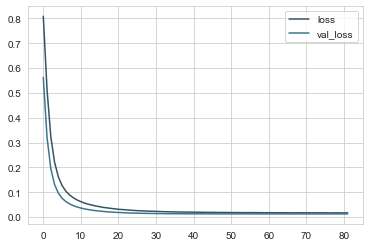

In [37]:

y_predict=model.predict_classes(scaler.transform(X))
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
confusion_matrix(Y,y_predict)

In [19]:
model.save('model')